## 확률적 경사 하강법
* 경사 하강법은 경사를 따라 내려가는 방법
* 가장 가파른 경사를 따라 원하는 지점에 도달하는 것이 목표
* 가장 가파른 길을 찾아 조금씩 내려오는 과정이 경사 하강법 모델을 훈련하는것!

## 확률적이란?
* 전체 샘플 중 하나의 샘플을 훈련에서 랜덤하게 골라 가장 가파른 길을 찾는다!
* 랜덤하게 하나의 샘플을 골라 경사를 내려가는 과정을 모든 샘플을 사용할 때까지 반복
* 모든 샘플을 사용했는데 아직 다 내려오지 못했다면, 훈련 세트에 모든 샘플을 다시 채워넣고 처음부터 반복

## 샘플을 꺼내는 방법은?
* 한개씩 꺼내는 확률적 경사 하강법
* 여러개씩 꺼내는 미니배치 경사 하강법
* 몽땅 꺼내는 배치 경사 하강법 -> 전체 데이터를 사용해서 안정적이나, 사용 자원도 가장 크다

## 손실함수는 머신러닝 알고리즘이 얼마나 엉터리인가 판단하는 기준
* 분류에서의 손실은?, 정답을 못맞추는것! -> 로지스틱 손실 함수(이진 크로스엔트로피 손실 함수), 다중 분류는 크로스엔트로피 손실 함수
* 회귀에서의 손실은?, 평균 절댓값 오차나 평균 제곱 오차(MSE) 사용


## SGDClassifier

In [2]:
import pandas as pd

In [3]:
fish = pd.read_csv("https://bit.ly/fish_csv_data")

In [4]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [7]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_output = fish['Species'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split

In [13]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_output, random_state = 42)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [16]:
from sklearn.linear_model import SGDClassifier

In [17]:
sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


c:\Users\cw3714\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### 1에포크 이어서 학습

In [18]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7983193277310925
0.775


In [19]:
import numpy as np

In [20]:
sc = SGDClassifier(loss = 'log_loss', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [21]:
for _ in range(300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

In [22]:
import matplotlib.pyplot as plt

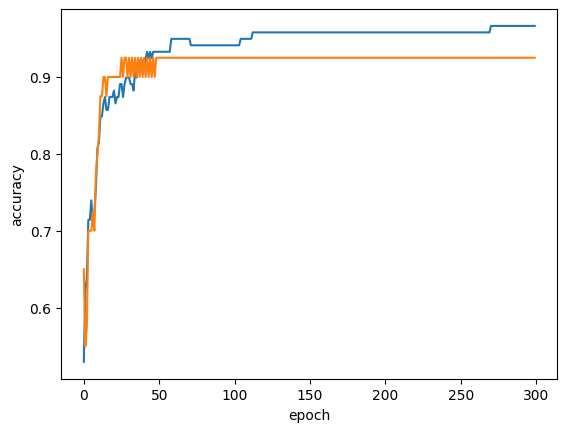

In [23]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [26]:
sc = SGDClassifier(loss = 'log_loss', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
